<a href="https://www.kaggle.com/code/hamiltonts/trabalho-100-remoto-mais-satisfat-rio?scriptVersionId=138444515" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **Qual a influência da modalidade de trabalho na satisfação, remuneração e diversidade** <a class="anchor"  id="introducao"></a>

https://www.kaggle.com/datasets/datahackers/state-of-data-2022

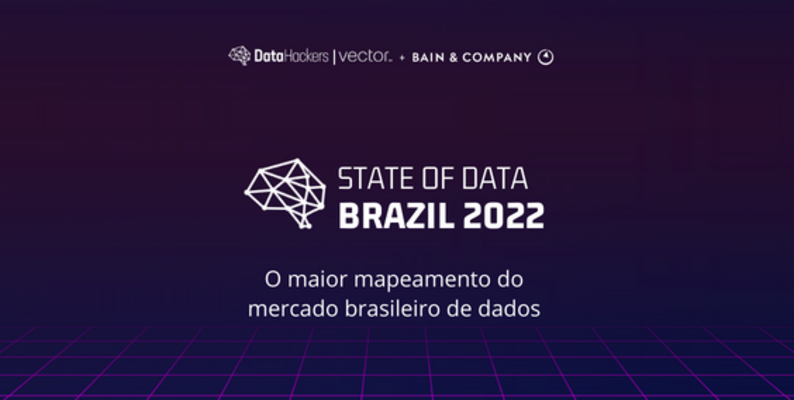

# *A ideia da criação deste estudo é verificar a relação entre modalidade de trabalho (remoto, misto ou presencial) com relaçao à satisfação com a empresa e algumas variáveis: raça/etnia, gênero, estado do Brasil, nível de ensino e faixa salarial.*

# **Resumo**

A modalidade de trabalho - **remota, híbrida ou presencial** - tem se mostrado um fator relevante para a experiência e retenção de profissionais de dados, conforme revelado na pesquisa State of Data 2022.

Seria interessante aprofundar a análise da interação entre o formato de trabalho e outras variáveis-chave, como satisfação com o emprego atual, remuneração média e diversidade entre os profissionais.

Algumas hipóteses que poderiam ser testadas:

* Profissionais em modelo 100% remoto apresentam maior satisfação devido à flexibilidade de horário e local de trabalho.
* Mulheres e minorias raciais estão mais satisfeitas e melhor remuneradas em modelos remotos, por diminuir vieses inconscientes relacionados à presença física.
* Há maior diversidade racial e de gênero entre profissionais full remotos versus aqueles full presenciais.
* Trabalho remoto aumenta acesso a oportunidades fora dos grandes centros, melhorando diversidade regional.
* Qual faixa salarial está mais satisfeita em termos de flexibilidade de forma de trabalho.
* Qual nível de ensino está mais satisfeito em termos de flexibilidade de forma de trabalho.

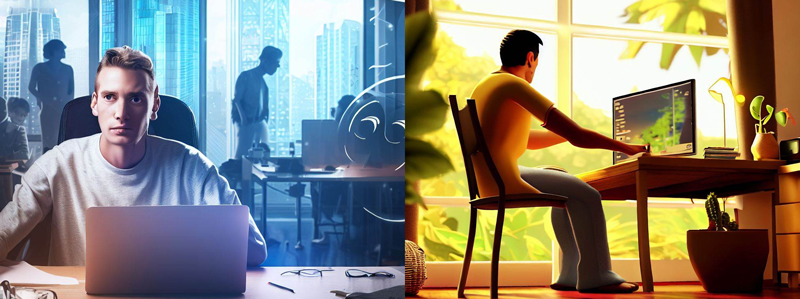

Os primeiros passos são a preparação do ambiente.

In [1]:
# entende e ajusta o ambiente
import sys
print(sys.version)

## instala bibliotecas que serão necessárias no ambiente Kaggle
!pip install stopwords
!pip install python-igraph
!pip install pycairo
!pip install mplcursors
!pip install ipywidgets

3.10.12 | packaged by conda-forge | (main, Jun 23 2023, 22:40:32) [GCC 12.3.0]
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 344.9/344.9 kB 6.3 MB/s eta 0:00:00
  Installing build dependencies ... - \ | / done
  Getting requirements to build wheel ... - done
  Installing backend dependencies ... - \ done
  Preparing metadata (pyproject.toml) ... - done
  Created wheel for pycairo: filename=pycairo-1.24.0-cp310-cp310-linux_x86_64.whl size=144201 sha256=ae59fda9f363eb984f343dc6edab241a67e1f748a8c2ce36f7b606121acf0df0
  Stored in directory: /root/.cache/pip/wheels/42/f6/f8/ad6377458a0a8eea738a091a499ca95d020c87e76d5d1dd6f5
Successfully built pycairo
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.0/89.0 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - \ done
  Created wheel for mplcursors: filename=mplcursors-0.5.2-py3-none-any.whl size=21069 sha256=f8c3f38525baf92caf6cd9a433a80794d78a086776d7ae9029d0cc213bcbb186
  Stored in directory: /root/.cache/pip/whe

In [2]:
# importação bibliotecas básicas
import numpy as np 
import pandas as pd
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from pandas import isna
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
import igraph
import matplotlib.colors as mcolors
import seaborn as sns
import mplcursors
from collections import Counter
from prettytable import PrettyTable
import plotly.graph_objects as go
import ipywidgets as widgets

# modo interativo
plt.ion()

# definições gerais
pd.set_option('display.max_columns', 100)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
# confirmando a existência da base de dados
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        base_de_dados = os.path.join(dirname, filename)

/kaggle/input/state-of-data-2022/State_of_data_2022.csv


In [4]:
df_preliminar = pd.read_csv(base_de_dados, low_memory=False)
df_preliminar.head()

,"('P0', 'id')","('P1_a ', 'Idade')","('P1_a_1 ', 'Faixa idade')","('P1_b ', 'Genero')","('P1_c ', 'Cor/raca/etnia')","('P1_d ', 'PCD')","('P1_e ', 'experiencia_profissional_prejudicada')","('P1_f ', 'aspectos_prejudicados')","('P1_g ', 'vive_no_brasil')","('P1_i ', 'Estado onde mora')","('P1_i_1 ', 'uf onde mora')","('P1_i_2 ', 'Regiao onde mora')","('P1_j ', 'Mudou de Estado?')","('P1_k ', 'Regiao de origem')","('P1_l ', 'Nivel de Ensino')","('P1_m ', 'Área de Formação')","('P2_a ', 'Qual sua situação atual de trabalho?')","('P2_b ', 'Setor')","('P2_c ', 'Numero de Funcionarios')","('P2_d ', 'Gestor?')","('P2_e ', 'Cargo como Gestor')","('P2_f ', 'Cargo Atual')","('P2_g ', 'Nivel')","('P2_h ', 'Faixa salarial')","('P2_i ', 'Quanto tempo de experiência na área de dados você tem?')","('P2_j ', 'Quanto tempo de experiência na área de TI/Engenharia de Software você teve antes de começar a trabalhar na área de dados?')","('P2_k ', 'Você está satisfeito na sua empresa atual?')","('P2_l ', 'Qual o principal motivo da sua insatisfação com a empresa atual?')","('P2_l_1 ', 'Falta de oportunidade de crescimento no emprego atual')","('P2_l_2 ', 'Salário atual não corresponde ao mercado')","('P2_l_3 ', 'Não tenho uma boa relação com meu líder/gestor')","('P2_l_4 ', 'Gostaria de trabalhar em em outra área de atuação')","('P2_l_5 ', 'Gostaria de receber mais benefícios')","('P2_l_6 ', 'O clima de trabalho/ambiente não é bom')","('P2_l_7 ', 'Falta de maturidade analítica na empresa')","('P2_m ', 'Você participou de entrevistas de emprego nos últimos 6 meses?')","('P2_n ', 'Você pretende mudar de emprego nos próximos 6 meses?')","('P2_o ', 'Quais os principais critérios que você leva em consideração no momento de decidir onde trabalhar?')","('P2_o_1 ', 'Remuneração/Salário')","('P2_o_2 ', 'Benefícios')","('P2_o_3 ', 'Propósito do trabalho e da empresa')","('P2_o_4 ', 'Flexibilidade de trabalho remoto')","('P2_o_5 ', 'Ambiente e clima de trabalho')","('P2_o_6 ', 'Oportunidade de aprendizado e trabalhar com referências na área')","('P2_o_7 ', 'Plano de carreira e oportunidades de crescimento profissional')","('P2_o_8 ', 'Maturidade da empresa em termos de tecnologia e dados')","('P2_o_9 ', 'Qualidade dos gestores e líderes')","('P2_o_10 ', 'Reputação que a empresa tem no mercado')","('P2_p ', 'Atualmente qual a sua forma de trabalho?')","('P2_q ', 'Qual a forma de trabalho ideal para você?')",...,"('P8_a ', 'Quais das opções abaixo fazem parte da sua rotina no trabalho atual com ciência de dados?')","('P8_a_1 ', 'Estudos Ad-hoc com o objetivo de confirmar hipóteses, realizar modelos preditivos, forecasts, análise de cluster para resolver problemas pontuais e responder perguntas das áreas de negócio.')","('P8_a_2 ', 'Sou responsável pela coleta e limpeza dos dados que uso para análise e modelagem.')","('P8_a_3 ', 'Sou responsável por entrar em contato com os times de negócio para definição do problema, identificar a solução e apresentação de resultados.')","('P8_a_4 ', 'Desenvolvo modelos de Machine Learning com o objetivo de colocar em produção em sistemas (produtos de dados).')","('P8_a_5 ', 'Sou responsável por colocar modelos em produção, criar os pipelines de dados, APIs de consumo e monitoramento.')","('P8_a_6 ', 'Cuido da manutenção de modelos de Machine Learning já em produção, atuando no monitoramento, ajustes e refatoração quando necessário.')","('P8_a_7 ', 'Realizo construções de dashboards em ferramentas de BI como PowerBI, Tableau, Looker, Qlik, etc')","('P8_a_8 ', 'Utilizo ferramentas avançadas de estatística como SAS, SPSS, Stata etc, para realizar análises estatísticas e ajustar modelos.Crio e dou manutenção em ETLs, DAGs e automações de pipelines de dados.')","('P8_a_9 ', 'Crio e dou manutenção em ETLs, DAGs e automações de pipelines de dados.')","('P8_a_10 ', 'Crio e gerencio soluções de Feature Store e cultura de MLOps.')","('P8_a_11 ', 'Sou responsável por criar e manter a infra que meus modelos e soluções rodam (clusters, s

In [5]:
# confirmando a quantidade de linhas
print("Total de linhas do dataset:", len(df_preliminar))

Total de linhas do dataset: 4271


In [6]:
# função para fazer uma nuvem de palavras
def cria_nuvem(dataset, campo):
    # remove o "NAN" para não entrar no conjunto de palavras
    dataset[campo] = dataset[campo].fillna("")
    
    todas_as_linhas = dataset[campo].str.split()
    texto_completo = ""
    for linha in todas_as_linhas:
        texto_completo += " ".join(linha) + " "
        
    # Remove pontuação com regex
    texto_completo = re.sub(r'[^\w\s]', '', texto_completo)         

    # Pré-processamento do texto
    texto_processado = ""
    for word in word_tokenize(texto_completo):
      if word.lower() not in stopwords.words("portuguese"):
        texto_processado += word + " "

    # imprime apenas um pedaço para avaliar    
    #print(texto_processado[0:200])  
    
    # Contando palavras
    palavras = word_tokenize(texto_processado)
    freq = dict()
    for palavra in palavras:
      if palavra in freq:
        freq[palavra] += 1
      else:
        freq[palavra] = 1
        
    # Contando palavras 
    freq = Counter(palavras)

    # Obtendo as 10 mais comuns
    top10 = freq.most_common(10)

    # Criando a tabela
    table = PrettyTable(['Palavra', 'Frequência'])

    # Adicionando as palavras 
    for palavra, qtd in top10:
        table.add_row([palavra, qtd])

    # Exibindo    
    print(table)   

    # Gerando nuvem de palavras        
    nuvem_palavras = WordCloud(width=800, height=400).generate_from_frequencies(freq)

    plt.figure(figsize=(15,8))
    plt.imshow(nuvem_palavras) 
    plt.axis("off")
    plt.show()

**Achei que eu deveria melhorar os nomes das colunas para tratar de forma mais fácil.**
Então, faço a remodelação dos nomes das colunas.

In [7]:
def clean_field_name(field_name):
    # Remove parênteses e apóstrofes
    cleaned_name = field_name.replace("(", "").replace(")", "").replace("'", "")
    # Substitui espaços por underscores
    cleaned_name = cleaned_name.replace(" ", "_")
    # Remove caracteres especiais
    cleaned_name = ''.join(char for char in cleaned_name if char.isalnum() or char == "_")
    # Transforma em letras minúsculas
    cleaned_name = cleaned_name.lower()
     # Remove duplo underscore
    cleaned_name = cleaned_name.replace("__", "_")
    return cleaned_name

In [8]:
# Renomeando as colunas
df_preliminar.columns = [clean_field_name(col) for col in df_preliminar.columns]
df_preliminar.head()

,p0_id,p1_a_idade,p1_a_1_faixa_idade,p1_b_genero,p1_c_corracaetnia,p1_d_pcd,p1_e_experiencia_profissional_prejudicada,p1_f_aspectos_prejudicados,p1_g_vive_no_brasil,p1_i_estado_onde_mora,p1_i_1_uf_onde_mora,p1_i_2_regiao_onde_mora,p1_j_mudou_de_estado,p1_k_regiao_de_origem,p1_l_nivel_de_ensino,p1_m_área_de_formação,p2_a_qual_sua_situação_atual_de_trabalho,p2_b_setor,p2_c_numero_de_funcionarios,p2_d_gestor,p2_e_cargo_como_gestor,p2_f_cargo_atual,p2_g_nivel,p2_h_faixa_salarial,p2_i_quanto_tempo_de_experiência_na_área_de_dados_você_tem,p2_j_quanto_tempo_de_experiência_na_área_de_tiengenharia_de_software_você_teve_antes_de_começar_a_trabalhar_na_área_de_dados,p2_k_você_está_satisfeito_na_sua_empresa_atual,p2_l_qual_o_principal_motivo_da_sua_insatisfação_com_a_empresa_atual,p2_l_1_falta_de_oportunidade_de_crescimento_no_emprego_atual,p2_l_2_salário_atual_não_corresponde_ao_mercado,p2_l_3_não_tenho_uma_boa_relação_com_meu_lídergestor,p2_l_4_gostaria_de_trabalhar_em_em_outra_área_de_atuação,p2_l_5_gostaria_de_receber_mais_benefícios,p2_l_6_o_clima_de_trabalhoambiente_não_é_bom,p2_l_7_falta_de_maturidade_analítica_na_empresa,p2_m_você_participou_de_entrevistas_de_emprego_nos_últimos_6_meses,p2_n_você_pretende_mudar_de_emprego_nos_próximos_6_meses,p2_o_quais_os_principais_critérios_que_você_leva_em_consideração_no_momento_de_decidir_onde_trabalhar,p2_o_1_remuneraçãosalário,p2_o_2_benefícios,p2_o_3_propósito_do_trabalho_e_da_empresa,p2_o_4_flexibilidade_de_trabalho_remoto,p2_o_5_ambiente_e_clima_de_trabalho,p2_o_6_oportunidade_de_aprendizado_e_trabalhar_com_referências_na_área,p2_o_7_plano_de_carreira_e_oportunidades_de_crescimento_profissional,p2_o_8_maturidade_da_empresa_em_termos_de_tecnologia_e_dados,p2_o_9_qualidade_dos_gestores_e_líderes,p2_o_10_reputação_que_a_empresa_tem_no_mercado,p2_p_atualmente_qual_a_sua_forma_de_trabalho,p2_q_qual_a_forma_de_trabalho_ideal_para_você,...,p8_a_quais_das_opções_abaixo_fazem_parte_da_sua_rotina_no_trabalho_atual_com_ciência_de_dados,p8_a_1_estudos_adhoc_com_o_objetivo_de_confirmar_hipóteses_realizar_modelos_preditivos_forecasts_análise_de_cluster_para_resolver_problemas_pontuais_e_responder_perguntas_das_áreas_de_negócio,p8_a_2_sou_responsável_pela_coleta_e_limpeza_dos_dados_que_uso_para_análise_e_modelagem,p8_a_3_sou_responsável_por_entrar_em_contato_com_os_times_de_negócio_para_definição_do_problema_identificar_a_solução_e_apresentação_de_resultados,p8_a_4_desenvolvo_modelos_de_machine_learning_com_o_objetivo_de_colocar_em_produção_em_sistemas_produtos_de_dados,p8_a_5_sou_responsável_por_colocar_modelos_em_produção_criar_os_pipelines_de_dados_apis_de_consumo_e_monitoramento,p8_a_6_cuido_da_manutenção_de_modelos_de_machine_learning_já_em_produção_atuando_no_monitoramento_ajustes_e_refatoração_quando_necessário,p8_a_7_realizo_construções_de_dashboards_em_ferramentas_de_bi_como_powerbi_tableau_looker_qlik_etc,p8_a_8_utilizo_ferramentas_avançadas_de_estatística_como_sas_spss_stata_etc_para_realizar_análises_estatísticas_e_ajustar_modeloscrio_e_dou_manutenção_em_etls_dags_e_automações_de_pipelines_de_dados,p8_a_9_crio_e_dou_manutenção_em_etls_dags_e_automações_de_pipelines_de_dados,p8_a_10_crio_e_gerencio_soluções_de_feature_store_e_cultura_de_mlops,p8_a_11_sou_responsável_por_criar_e_manter_a_infra_que_meus_modelos_e_soluções_rodam_clusters_servidores_api_containers_etc,p8_b_quais_as_técnicas_e_métodos_listados_abaixo_você_costuma_utilizar_no_trabalho,p8_b_1_utilizo_modelos_de_regressão_linear_logística_glm,p8_b_2_utilizo_redes_neurais_ou_modelos_baseados_em_árvore_para_criar_modelos_de_classificação,p8_b_3_desenvolvo_sistemas_de_recomendação_recsys,p8_b_4_utilizo_métodos_estatísticos_bayesianos_para_analisar_dados,p8_b_5_utilizo_técnicas_de_nlp_natural_language_processing_para_análisar_dados_nãoestruturados,p8_b_6_utilizo_métodos_estatísticos_clássicos_testes_de_hipótese_análise_multivariada_sobrevivência_dados_longitudinais_inferência_estatistica_para_analisar_dados,p8_b_7_utilizo_cadeias_de_ma

In [9]:
# remove as colunas não necessários no trabalho para efeito de facilidade e performance
df = df_preliminar[['p1_a_idade', 
                    'p1_b_genero', 
                    "p2_p_atualmente_qual_a_sua_forma_de_trabalho", 
                    'p2_k_você_está_satisfeito_na_sua_empresa_atual',
                    'p1_c_corracaetnia',
                    'p1_g_vive_no_brasil',
                    'p1_i_1_uf_onde_mora',
                    'p1_l_nivel_de_ensino',
                    'p2_h_faixa_salarial'
                   ]].copy()
df.head()

,p1_a_idade,p1_b_genero,p2_p_atualmente_qual_a_sua_forma_de_trabalho,p2_k_você_está_satisfeito_na_sua_empresa_atual,p1_c_corracaetnia,p1_g_vive_no_brasil,p1_i_1_uf_onde_mora,p1_l_nivel_de_ensino,p2_h_faixa_salarial
0,39.0,Masculino,Modelo 100% presencial,True,Parda,True,DF,Pós-graduação,de R$ 8.001/mês a R$ 12.000/mês
1,32.0,Masculino,Modelo 100% presencial,False,Parda,True,PA,Graduação/Bacharelado,de R$ 4.001/mês a R$ 6.000/mês
2,53.0,Masculino,Modelo híbrido com dias fixos de trabalho pres...,False,Branca,True,DF,Pós-graduação,de R$ 12.001/mês a R$ 16.000/mês
3,27.0,Masculino,Modelo híbrido flexível (o funcionário tem lib...,True,Branca,True,MG,Doutorado ou Phd,de R$ 12.001/mês a R$ 16.000/mês
4,46.0,Feminino,Modelo 100% presencial,False,Branca,True,PA,Pós-graduação,de R$ 6.001/mês a R$ 8.000/mês


**Aqui eu realizo alguns ajustes e preenchimento de informações faltantes**

In [10]:
forma_trabalho = df["p2_p_atualmente_qual_a_sua_forma_de_trabalho"].copy()
print(forma_trabalho.value_counts())

Modelo 100% remoto                                                                                                1689
Modelo híbrido flexível (o funcionário tem liberdade para escolher quando estar no escritório presencialmente)     946
Modelo 100% presencial                                                                                             582
Modelo híbrido com dias fixos de trabalho presencial                                                               477
Name: p2_p_atualmente_qual_a_sua_forma_de_trabalho, dtype: int64


In [11]:
# no campo de idade coloca informação fixa (18 anos) em campo vazio e transforma em inteiro
df['p1_a_idade'] = df['p1_a_idade'].fillna(18)
df['p1_a_idade'] = df['p1_a_idade'].astype(int)

# converte texto de SEXO para número
# substitui NaN por 'Prefiro não informar'
df['p1_b_genero'] = df['p1_b_genero'].fillna('Prefiro não informar')
# Mapeamento de valores para códigos
genero_map = {'Masculino': 'Masculino', 'Feminino': 'Feminino', 'Prefiro não informar': 'Outros'}
# Aplicar mapeamento
df['genero'] = df['p1_b_genero'].map(genero_map)

# reduz frase de p2_p_atualmente_qual_a_sua_forma_de_trabalho para melhor visualização
# Mapeamento de valores 
modelo_map = {'Modelo 100% remoto': '1 - Remoto',
              'Modelo híbrido flexível (o funcionário tem liberdade para escolher quando estar no escritório presencialmente)': "2 - Híbrido flexível",
              'Modelo 100% presencial': '4 - Presencial',
              'Modelo híbrido com dias fixos de trabalho presencial': "3 - Híbrido fixo"
             }
# Aplicar mapeamento
df['forma_de_trabalho'] = df['p2_p_atualmente_qual_a_sua_forma_de_trabalho'].map(modelo_map)

# Função para fazer a substituição
def substituir_salario(salario):
    if isinstance(salario, str):  # Verifica se o valor é uma string
        if 'Menos de' in salario:
            return '01 - R$ 1k/mês'
        elif '1.001' in salario:
            return '02 - R$ 1-2k/mês'
        elif '2.001' in salario:
            return '03 - R$ 2-3k/mês'
        elif '3.001' in salario:
            return '04 - R$ 3-4k/mês'
        elif '4.001' in salario:
            return '05 - R$ 4-6k/mês'
        elif '6.001' in salario:
            return '06 - R$ 6-8k/mês'
        elif '8.001' in salario:
            return '07 - R$ 8-12k/mês'
        elif '12.001' in salario:
            return '08 - R$ 12-16k/mês'
        elif '16.001' in salario:
            return '09 - R$ 16-20k/mês'
        elif '20.001' in salario:
            return '10 - R$ 20-25k/mês'
        elif '25.001' in salario:
            return '11 - R$ 25-30k/mês'
        elif '30.001' in salario:
            return '12 - R$ 30-40k/mês'
        elif '40.001' in salario:
            return '13 - + R$ 40k/mês'
        else:
            return salario
    else:
        return salario
    
# Aplica a função de substituição na coluna 'salario' do DataFrame
df['salario'] = df['p2_h_faixa_salarial'].apply(substituir_salario)


In [12]:
print(df['forma_de_trabalho'].value_counts())

1 - Remoto              1689
2 - Híbrido flexível     946
4 - Presencial           582
3 - Híbrido fixo         477
Name: forma_de_trabalho, dtype: int64


In [13]:
print(df['p2_k_você_está_satisfeito_na_sua_empresa_atual'].value_counts())

True     2734
False     960
Name: p2_k_você_está_satisfeito_na_sua_empresa_atual, dtype: int64


# **Situação Geral de Satisfação** <a class="anchor"  id="satisfacaogeral"></a>

**Como está o nível de satisfação geral dos profissionais com relação à sua empresa**

Em números absolutos, há uma grande predominância de satisfação com relação à empresa atual.

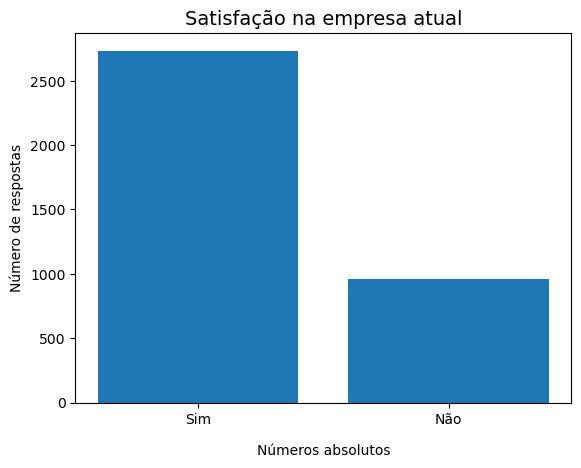

In [14]:
# %%capture
filtro = df["p2_k_você_está_satisfeito_na_sua_empresa_atual"].copy()

# Contando ocorrências 
sim = len(filtro[filtro == True])
nao = len(filtro[filtro == False])

# Criando o gráfico
plt.bar(["Sim", "Não"], [sim, nao])
plt.title("Satisfação na empresa atual", fontsize=14)
plt.text(0.5, -0.15, "Números absolutos", fontsize=10, ha='center', va='bottom', transform=plt.gca().transAxes)
plt.ylabel("Número de respostas")
plt.xticks(rotation=0) 

x_annotation = widgets.Label(value="O valor da coluna x é:")
plt.annotate(x_annotation, xy=(2, 8), xytext=(20, 20), textcoords="offset points", ha="right", va="bottom")

plt.show()

# **Detalhamento por divesas características** <a class="anchor"  id="detalhamento"></a>

# **A partir deste ponto, todos os gráficos são apresentados na forma proporcional!**

**Nos próximos gráficos, o TRUE (coluna da direita) se refere ao grupo de pessoas que indicaram que estão satisfeitos com a empresa atual.**

* [Raça/Etnia](#detalhamentoRaca)
* [Gênero](#detalhamentogenero)
* [Estado do Brasil](#detalhamentoestado)
* [Nível de Ensino](#detalhamentonivel)
* [Faixa Salarial](#detalhamentofaixa)

**Como está o nível de satisfação geral dos profissionais com relação à sua empresa em função da forma de trabalho**  

Aqui, em proporção, pode-se notar que há uma maior satisfação quando o modelo é 100% remoto ou híbrido flexivel.

In [15]:
# Filtrando colunas da forma de trabalho
# só executa uma vez
trabalho = df["forma_de_trabalho"].copy() 

def apresenta_grafico_comparativo(campo, titulo, onde_linha):
    satisfacao = df[campo].copy()
    # Agrupando por satisfação e trabalho
    grouped = df.groupby([satisfacao, trabalho]).size().reset_index(name='count')
    grouped = grouped.sort_values(by=campo,ascending=False).reset_index(drop=True)
    
    # Calcula as somas totais por satisfação
    totals = grouped.groupby(campo).sum(numeric_only=True)

    # Divide os valores pelo total
    proportions = grouped.set_index([campo, 
                                     'forma_de_trabalho'])['count'].div(totals['count'], 
                                    level=campo).reset_index()
    # Inverter a ordem de saída para deixar TRUE na frente
    proportions[campo] = proportions[campo].sort_values(ascending=False).reset_index(drop=True)

    # Plotando o gráfico
    ax = proportions.pivot(index=campo, 
                       columns='forma_de_trabalho', 
                       values='count').plot(kind='bar', stacked=True)

    ax.set_ylabel("Proporção de respostas")
    # ax.set_xticklabels(["Não", "Sim"])

    ax.set_title(titulo)
    ax.legend(title="Forma de trabalho", loc="center left", bbox_to_anchor=(1.02, 0.5))
    # removendo o nome do campo do eixo x
    ax.set_xlabel('')

    # Adicionando a linha fixa em 50% dos valores
    if onde_linha > 0:
        ax.axhline(y=onde_linha, color='red', linestyle='--', label='50%')

    plt.show()
    
# # Habilita o cursor interativo 
# cursor = mplcursors.cursor(hover=True)

# # Função para exibir anotação
# @mplcursors.cursor(multiple=True)
# def cursor_annotation(sel):
#     for c in sel.event.canvas.figure.get_axes():
#             if c.contains(sel.event)[0]:
#                 sel.annotation.set_text(f"{c.get_ylabel()}: {int(sel.target[1])}")
#                 sel.annotation.xy = (10, sel.target[1])
#                 sel.annotation.set_rotation(90)
                
# cursor.connect('add', cursor_annotation)                

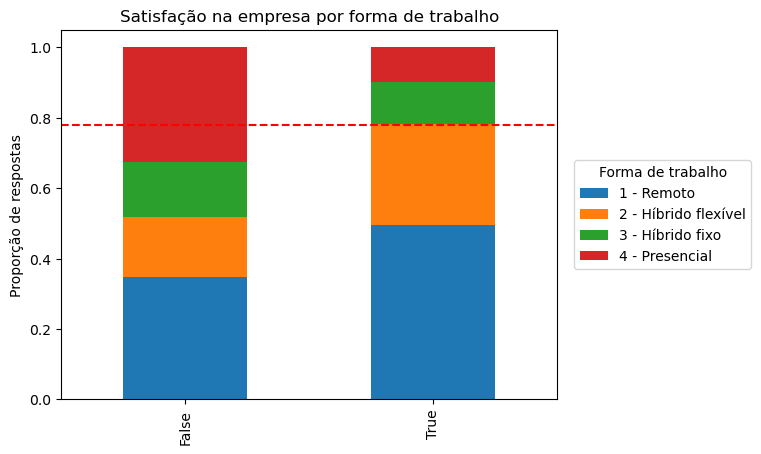

In [16]:
apresenta_grafico_comparativo('p2_k_você_está_satisfeito_na_sua_empresa_atual', "Satisfação na empresa por forma de trabalho", 0.78)

## RAÇA/ETNIA <a class="anchor"  id="detalhamentoRaca"></a>

**Como está distribuição de forma de trabalho em função da raça/etnia, sem considerar a forma de trabalho**

**Apresentando de forma proporcial**

Curiosidade: As pessoas que se declararam da raça Indígena apresentam mais de 50% em modelo 100% remoto.

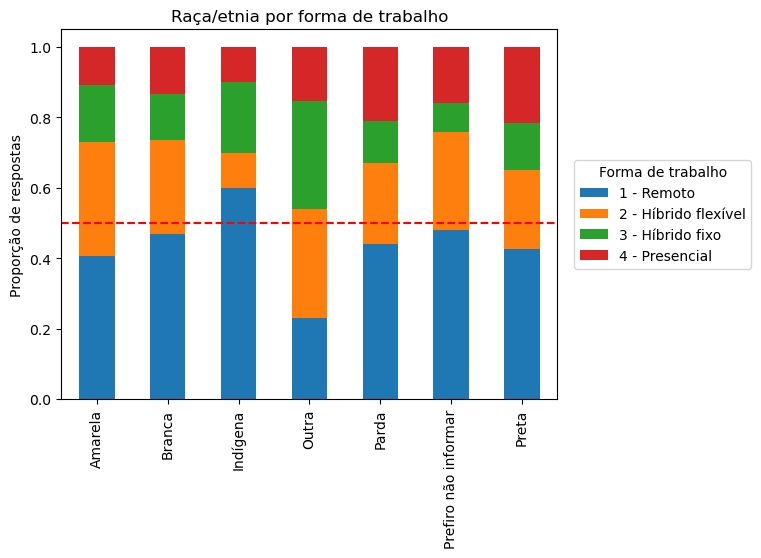

In [17]:
apresenta_grafico_comparativo('p1_c_corracaetnia', "Raça/etnia por forma de trabalho", 0.5)

In [18]:
def apresenta_bloco_comparativo_individual(campo, variaveis, titulo, onde_linha):
    num_cols = 3
    # Número de gráficos a serem gerados
    num_graficos = len(variaveis)
    nrows = int(num_graficos / num_cols) + 1
    ncols = num_cols
    
    # Cria figura e eixo
    fig, axes = plt.subplots(nrows, ncols, figsize=(12, 2.5*nrows)) ## varia a altura de acordo com o número de linhas
    
    # remove blocos não usados
    for ax in axes.flatten()[num_graficos:]:
        ax.remove()

    # Gera cada gráfico 
    gerados = 0
    for i in range(nrows):
        for j in range(ncols):
            gerados = gerados + 1
            if gerados <= num_graficos:
                opcao = variaveis[i*ncols + j]
                satisfacao = df[df[campo] == opcao]['p2_k_você_está_satisfeito_na_sua_empresa_atual'].copy()
                # Agrupando por satisfação e trabalho
                grouped = df.groupby([satisfacao, trabalho]).size().reset_index(name='count')
                grouped = grouped.sort_values(by='p2_k_você_está_satisfeito_na_sua_empresa_atual',ascending=False).reset_index(drop=True)

                if len(grouped) > 0:
                    # Calcula as somas totais por satisfação
                    totals = grouped.groupby('p2_k_você_está_satisfeito_na_sua_empresa_atual').sum(numeric_only=True)

                    # Divide os valores pelo total
                    proportions = grouped.set_index(['p2_k_você_está_satisfeito_na_sua_empresa_atual', 
                                                     'forma_de_trabalho'])['count'].div(totals['count'], 
                                                    level='p2_k_você_está_satisfeito_na_sua_empresa_atual').reset_index()
                    # Inverter a ordem de saída para deixar TRUE na frente
                    proportions['p2_k_você_está_satisfeito_na_sua_empresa_atual'] = proportions['p2_k_você_está_satisfeito_na_sua_empresa_atual'].sort_values(ascending=False).reset_index(drop=True)

                    # Plotando o gráfico
                    proportions.pivot(index='p2_k_você_está_satisfeito_na_sua_empresa_atual', 
                                       columns='forma_de_trabalho', 
                                       values='count').plot(kind='bar', stacked=True, ax=axes[i,j], legend=False)

                    axes[i,j].set_title(titulo + opcao)
                    # removendo o nome do campo do eixo x
                    axes[i,j].set_xlabel('')

                    # Adicionando a linha fixa em 50% dos valores
                    axes[i,j].axhline(y=onde_linha, color='red', linestyle='--', label='50%')

    # Ajusta espaçamento entre gráficos
    plt.tight_layout() 
    plt.show()

Agora vamos entender se a forma de trabalho influencia na satisfação na empresa de acordo com cada raça/etnia.

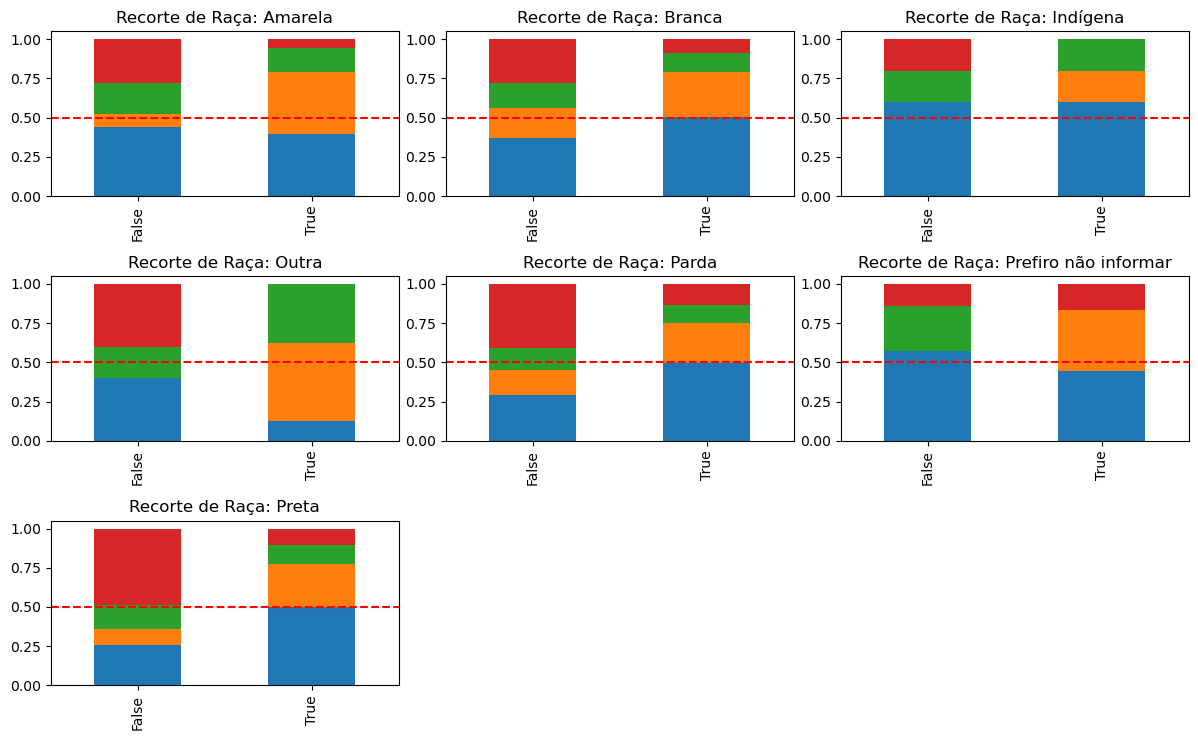

In [19]:
raca = sorted(df['p1_c_corracaetnia'].unique())
apresenta_bloco_comparativo_individual('p1_c_corracaetnia', raca, 'Recorte de Raça: ', 0.5)

## GÊNERO <a class="anchor"  id="detalhamentogenero"></a>

**Como está distribuição de forma de trabalho em função do gênero**

**Apresentando de forma proporcial**

Pode-se notar que há uma maior proporção de mulheres em modelo 100% remoto ou híbrido flexivel.

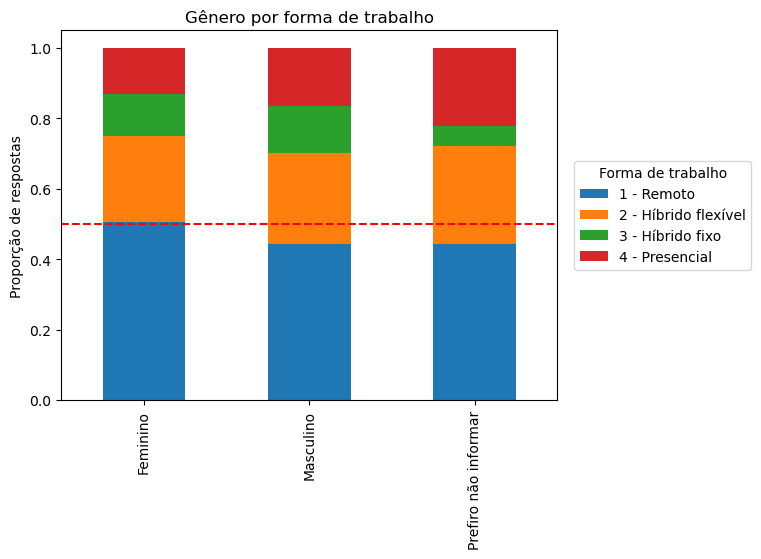

In [20]:
apresenta_grafico_comparativo('p1_b_genero', "Gênero por forma de trabalho", 0.5)

Agora vamos entender se a forma de trabalho influencia na satisfação na empresa de acordo com cada gênero.


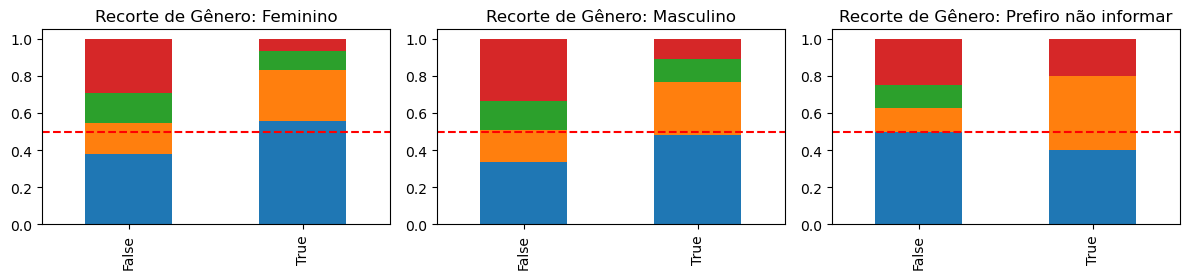

In [21]:
genero = sorted(df['p1_b_genero'].unique())
apresenta_bloco_comparativo_individual('p1_b_genero', genero, 'Recorte de Gênero: ', 0.5)

## ESTADO DO BRASIL <a class="anchor"  id="detalhamentoestado"></a>

**Como está distribuição de forma de trabalho em função o estado do Brasil**

**Apresentando de forma proporcial**

Há alguns estados fora do eixo RJ/SP que possuem maior quantidade de 100% remoto. São eles: AL, CE, GO, MG, MS, PA, PB, PE, PI, PR, RN e SE. Além disso, MS, PA e PI não apresentam situações de regime de trabalho híbrido fixo. Já MT é onde há a maior proporção de trabalho presencial.

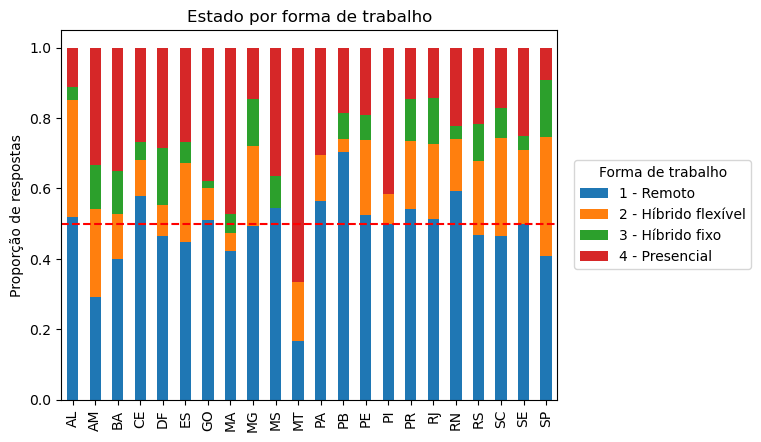

In [22]:
apresenta_grafico_comparativo('p1_i_1_uf_onde_mora', "Estado por forma de trabalho", 0.5)

Agora vamos entender se a forma de trabalho influencia na satisfação na empresa de acordo com cada estado.

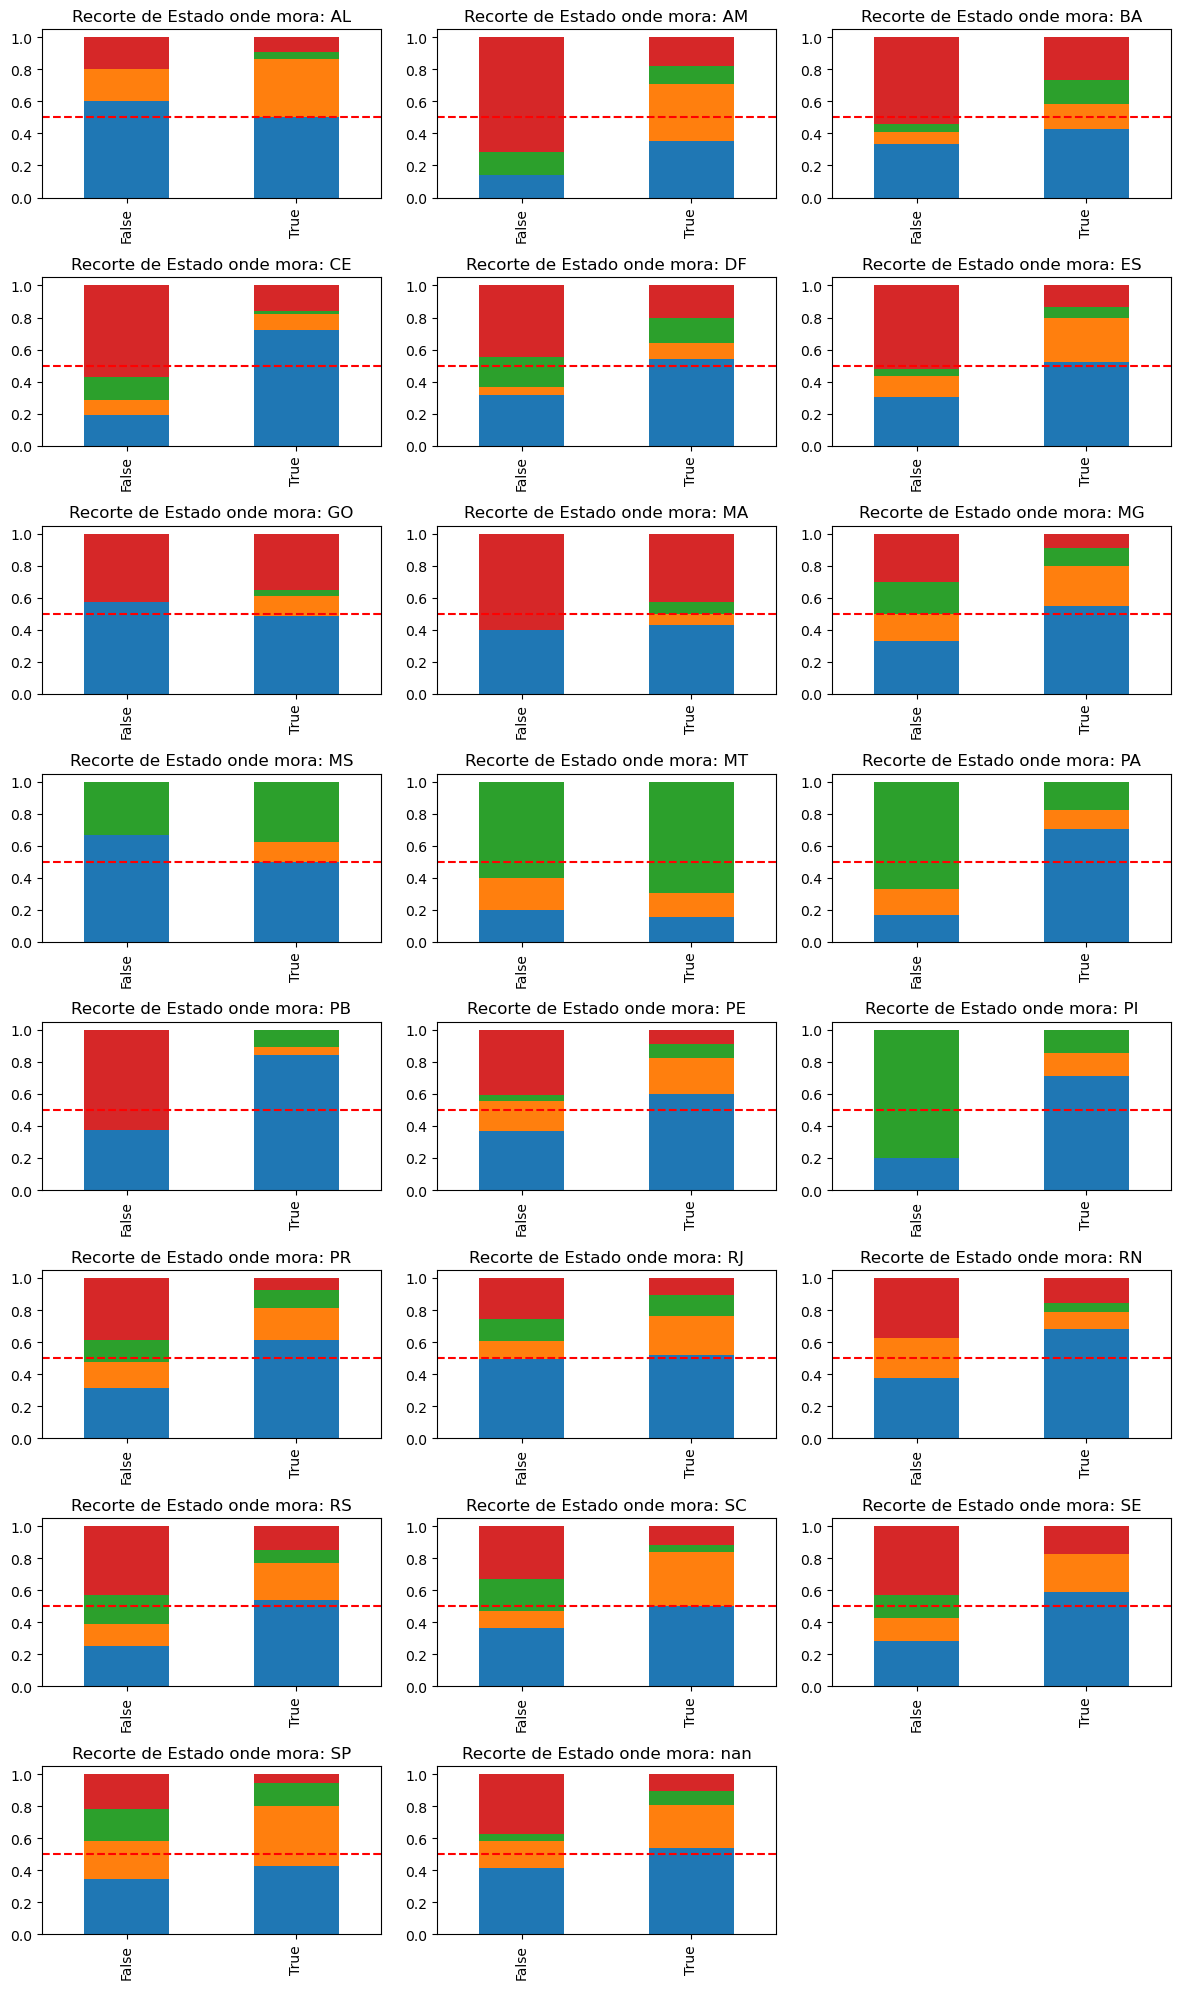

In [23]:
df['p1_i_1_uf_onde_mora'] = df['p1_i_1_uf_onde_mora'].astype(str) 
estado = sorted(df['p1_i_1_uf_onde_mora'].unique())
apresenta_bloco_comparativo_individual('p1_i_1_uf_onde_mora', estado, 'Recorte de Estado onde mora: ', 0.5)

## NÍVEL DE ENSINO <a class="anchor"  id="detalhamentonivel"></a>

**Como está distribuição de forma de trabalho em função do nível de ensino**

**Apresentando de forma proporcial**

Doutorado, Mestrado e "Prefiro não informar" são predominantemente executados de forma 100% remota.

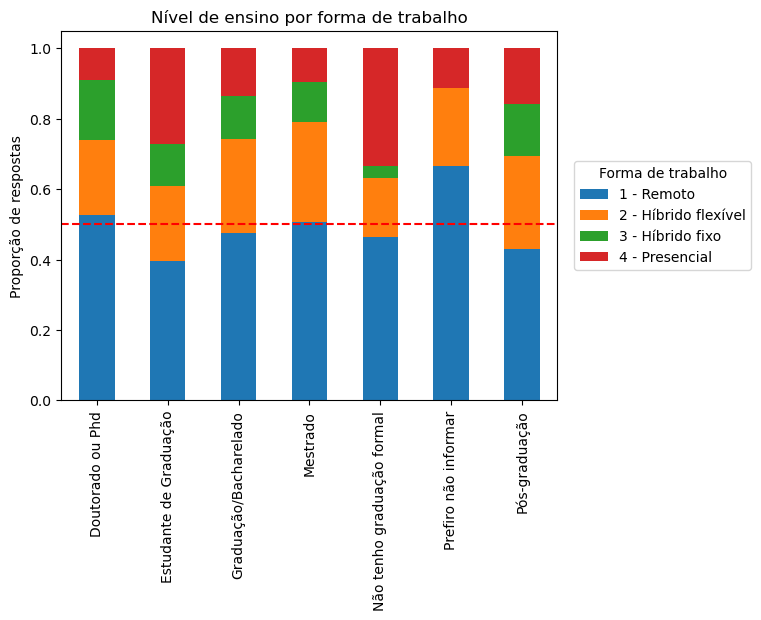

In [24]:
apresenta_grafico_comparativo('p1_l_nivel_de_ensino', 'Nível de ensino por forma de trabalho', 0.5)

Agora vamos entender se a forma de trabalho influencia na satisfação na empresa de acordo com cada nível de ensino.

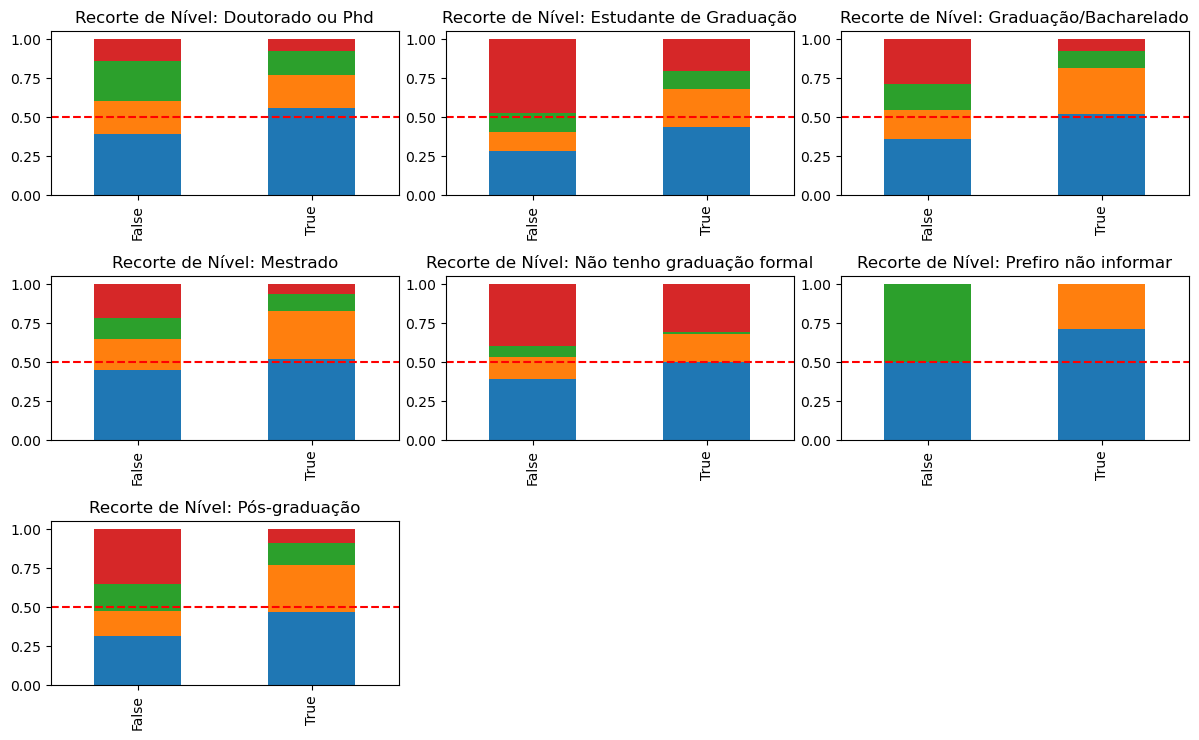

In [25]:
nivel = sorted(df['p1_l_nivel_de_ensino'].unique())
apresenta_bloco_comparativo_individual('p1_l_nivel_de_ensino', nivel, 'Recorte de Nível: ', 0.5)

## FAIXA SALARIAL <a class="anchor"  id="detalhamentofaixa"></a>

**Como está distribuição de forma de trabalho em função da faixa salarial**

**Apresentando de forma proporcial**

As faixa salariais maiores tendem a ter a forma de trabalho 100% remota mais expressiva, enquanto que as faixas salariais mais baixas tendem a ter mais trabalho presencial e híbrido fixo.

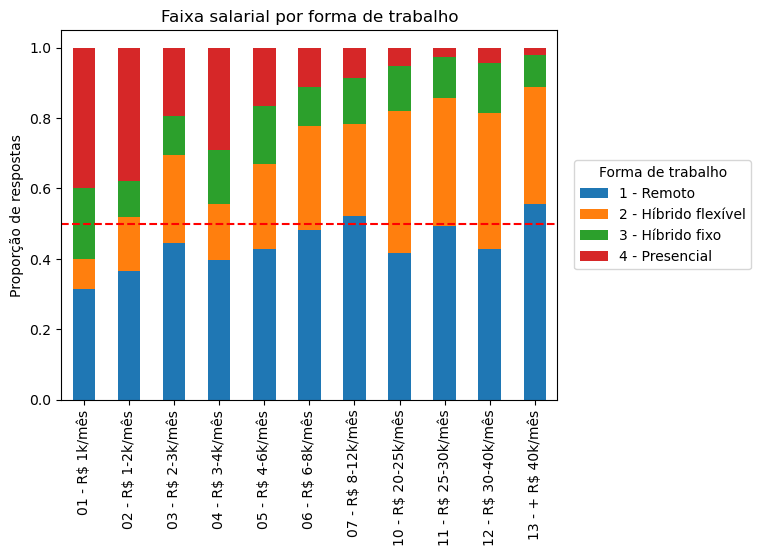

In [26]:
apresenta_grafico_comparativo('salario', 'Faixa salarial por forma de trabalho', 0.5)

Agora vamos entender se a forma de trabalho influencia na satisfação na empresa de acordo com cada faixa salarial.


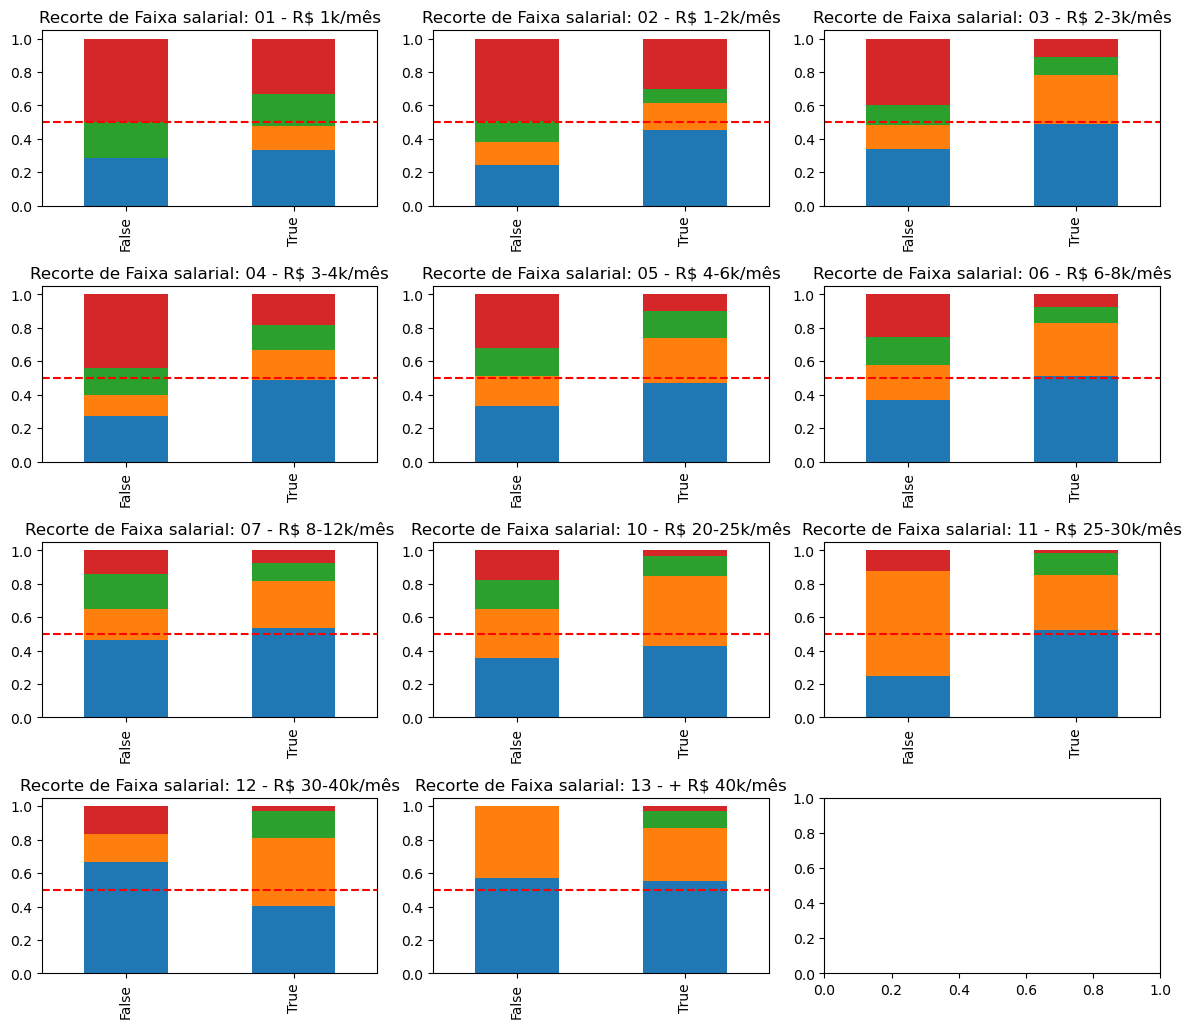

In [27]:
df['salario'] = df['salario'].astype(str) 
faixa = sorted(df['salario'].unique())
apresenta_bloco_comparativo_individual('salario', faixa, 'Recorte de Faixa salarial: ', 0.5)

# **CONCLUSÃO** <a class="anchor"  id="conclusao"></a>

Ao analisar essas visões, obtemos insights valiosos sobre o real impacto da modalidade de trabalho na experiência, localização, gênero e perfil da força de trabalho em dados. Os gráficos apresentados revelam tendências importantes que podem orientar as empresas na formulação de políticas mais inclusivas e atrativas de trabalho remoto, presencial e híbrido.

**De modo geral**, observa-se uma maior satisfação com a empresa entre quem trabalha 100% remoto ou em modelo híbrido flexível, em comparação ao presencial. Porém, esse padrão não é consistente em todos os perfis. Por exemplo, profissionais que preferiram não informar o gênero mostraram mais satisfação no trabalho presencial. Como não é um padrão geral, isso destaca a importância de analisar cada segmento separadamente, sem generalizações, ao elaborar políticas de trabalho.

Os insights apresentados fornecem um panorama inicial do cenário atual. Porém, estudos mais aprofundados seriam necessários para entender as causas subjacentes e necessidades específicas dos perfis identificados (e outros não avaliados aqui). Assim, as empresas poderão implementar soluções customizadas, garantindo maior engajamento, produtividade e retenção de talentos.